In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [16]:
exp_mat = pd.read_excel('mmc6.xlsx', 0, header=None, index_col=0)

In [18]:
exp_mat.head()

,1,2,3,4,5,6,7,8,9,10,...,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585
0,,,,,,,,,,,,,,,,,,,,,
'Tal1',34,18,15,21,17,12,11,4,14,24,...,13,0,1,7,6,3,0,4,1,4
'Dmbx1',14,15,11,20,1,14,8,9,3,7,...,2,2,2,8,5,1,0,3,2,0
'Emx2',29,23,32,29,8,13,6,6,9,9,...,1,5,4,3,6,0,4,0,6,0
'Uncx',17,6,3,6,14,5,11,1,0,7,...,0,0,3,8,0,0,2,0,4,6
'Paxip1',31,36,42,44,15,8,20,19,13,11,...,7,10,4,19,5,1,1,9,1,3


In [35]:
field_vector = pd.read_excel('mmc6.xlsx', 1, header=None).T
field_vector.index += 1
field_vector.columns = ['field']

In [19]:
sample_info = pd.read_excel('mmc6.xlsx', 2, header=None)
sample_info.index += 1
sample_info.columns= ['x', 'y', 'z']

In [38]:
sample_info = sample_info.join(field_vector)

In [133]:
sample_info['total_count'] = exp_mat.sum(0)

In [101]:
sample_info.field.unique().shape

(21,)

In [43]:
sample_info.field.value_counts()

53    362
52    334
44    270
43    257
42    238
45    187
41    185
50    148
48    146
34    144
40    135
47    131
49    131
38    127
35    124
46    122
37    119
51    116
36    108
39    104
33     97
Name: field, dtype: int64

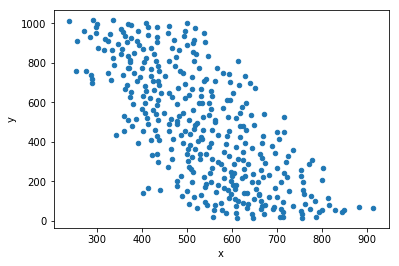

In [52]:
sample_info.query('field == 53').plot('x', 'y', 'scatter');

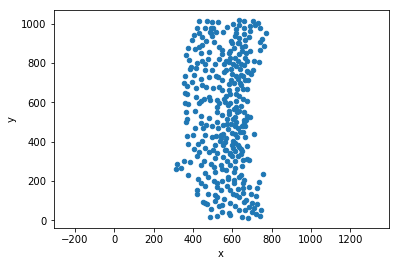

In [103]:
sample_info.query('field == 52').plot('x', 'y', 'scatter');
plt.axis('equal');

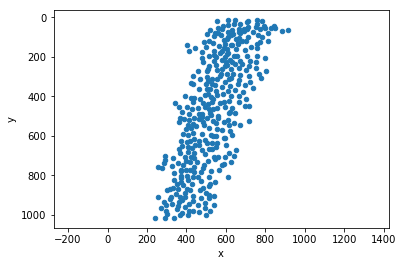

In [106]:
sample_info.query('field == 53').plot('x', 'y', 'scatter');
plt.axis('equal');
plt.gca().invert_yaxis();

In [107]:
sample_info.field.unique()

array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53])

In [108]:
sample_info.field.unique().shape

(21,)

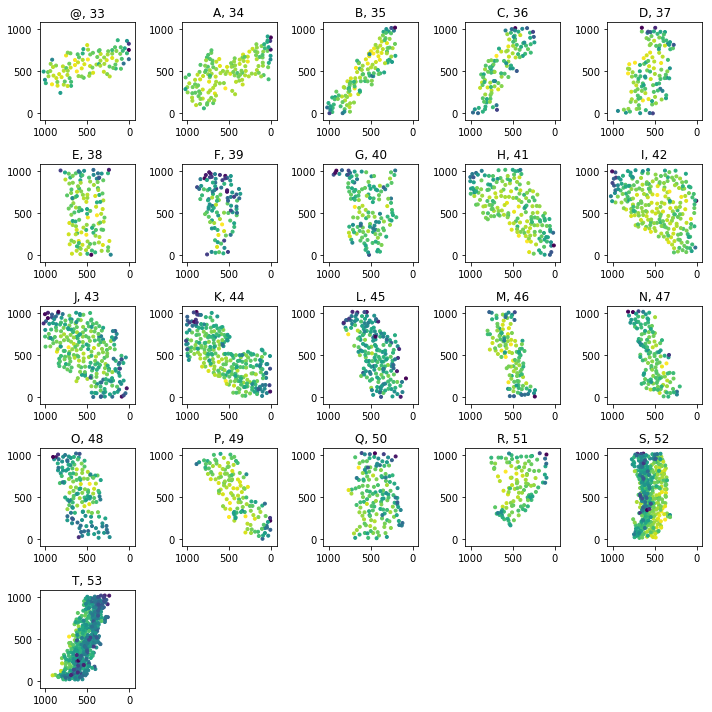

In [316]:
figsize(10, 10)
for i, field in enumerate(sample_info.field.unique()):
    plt.subplot(5, 5, i+1)
    tmp = sample_info.query('field == {}'.format(field))
    plt.scatter(tmp['x'], tmp['y'], marker='.', c=np.log10(tmp.total_count));
    plt.axis('equal');
    plt.xlim(-100, 1100);
    plt.ylim(-100, 1100);
    plt.gca().invert_xaxis();
#     plt.gca().invert_yaxis();
    plt.title(chr(ord('A') + i - 1) + ', ' + '{}'.format(field))

plt.tight_layout()

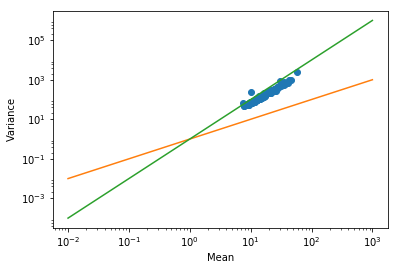

In [413]:
plt.loglog()
plt.scatter(exp_mat.mean(1), exp_mat.var(1));
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

In [414]:
exp_mat.mean(1).sort_values(ascending=False).head(10)

0
'slc17a7'    58.339749
'th'         46.765969
'Ctnnb1'     42.904881
'xdh'        40.775453
'pdgfra'     36.147280
'foxj1'      35.978801
'camk2'      35.621478
'htr3a'      34.648536
'myl14'      32.722176
'palvb'      31.889540
dtype: float64

In [73]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA(2)

In [383]:
import NaiveDE

In [388]:
dfm = NaiveDE.stabilize(exp_mat).T

In [389]:
Y = pca.fit_transform(scale(dfm, 1))

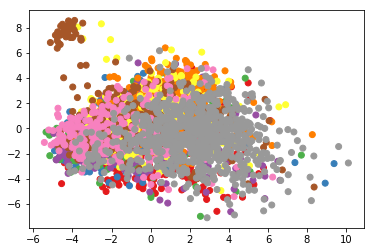

In [390]:
plt.scatter(*Y.T, c=sample_info.field, cmap=cm.Set1);

In [391]:
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log10(total_count)').T

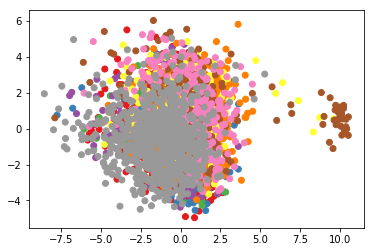

In [392]:
figsize(6, 4)
Y = pca.fit_transform(scale(res, 1))
plt.scatter(*Y.T, c=sample_info.field, cmap=cm.Set1);

In [239]:
from sklearn.manifold import TSNE

In [406]:
Y = PCA(30).fit_transform(exp_mat.T)
tsne = TSNE(verbose=2)
YY = tsne.fit_transform(Y)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3585
[t-SNE] Computed conditional probabilities for sample 2000 / 3585
[t-SNE] Computed conditional probabilities for sample 3000 / 3585
[t-SNE] Computed conditional probabilities for sample 3585 / 3585
[t-SNE] Mean sigma: 15.958125
[t-SNE] Iteration 25: error = 2.0274873, gradient norm = 0.0081086
[t-SNE] Iteration 50: error = 1.9306356, gradient norm = 0.0051075
[t-SNE] Iteration 75: error = 1.6498603, gradient norm = 0.0024596
[t-SNE] Iteration 100: error = 1.5971379, gradient norm = 0.0021663
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.597138
[t-SNE] Iteration 125: error = 1.5114188, gradient norm = 0.0017679
[t-SNE] Iteration 150: error = 1.4852957, gradient norm = 0.0017312
[t-SNE] Iteration 175: error = 1.4795598, gradient norm = 0.0013490
[t-SNE] Iteration 200: error = 1.4772562, gradient norm = 0.0016293
[t-SNE

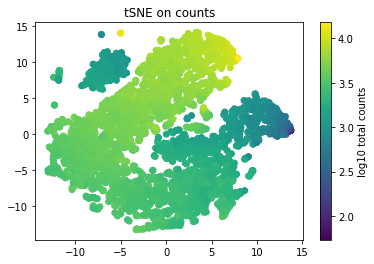

In [407]:
plt.scatter(YY[:,0], YY[:,1], c=np.log10(sample_info.total_count));
plt.colorbar(label='log10 total counts');
plt.title('tSNE on counts');

In [408]:
Y = PCA(30).fit_transform(dfm)
tsne = TSNE(verbose=2)
YY = tsne.fit_transform(Y)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3585
[t-SNE] Computed conditional probabilities for sample 2000 / 3585
[t-SNE] Computed conditional probabilities for sample 3000 / 3585
[t-SNE] Computed conditional probabilities for sample 3585 / 3585
[t-SNE] Mean sigma: 1.601270
[t-SNE] Iteration 25: error = 1.9500742, gradient norm = 0.0089411
[t-SNE] Iteration 50: error = 1.8524872, gradient norm = 0.0056644
[t-SNE] Iteration 75: error = 1.6219805, gradient norm = 0.0019461
[t-SNE] Iteration 100: error = 1.5829585, gradient norm = 0.0023477
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.582958
[t-SNE] Iteration 125: error = 1.5173489, gradient norm = 0.0012132
[t-SNE] Iteration 150: error = 1.4975454, gradient norm = 0.0017420
[t-SNE] Iteration 175: error = 1.4929661, gradient norm = 0.0020566
[t-SNE] Iteration 200: error = 1.4932262, gradient norm = 0.0018001
[t-SNE]

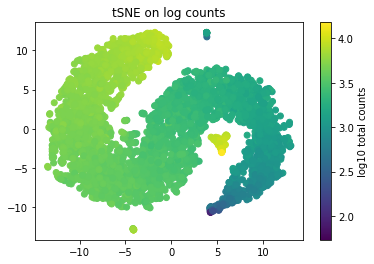

In [409]:
plt.scatter(YY[:,0], YY[:,1], c=np.log10(sample_info.total_count));
plt.colorbar(label='log10 total counts');
plt.title('tSNE on log counts');

In [395]:
Y = PCA(30).fit_transform(res)
tsne = TSNE(verbose=2)
YY = tsne.fit_transform(Y)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3585
[t-SNE] Computed conditional probabilities for sample 2000 / 3585
[t-SNE] Computed conditional probabilities for sample 3000 / 3585
[t-SNE] Computed conditional probabilities for sample 3585 / 3585
[t-SNE] Mean sigma: 1.248813
[t-SNE] Iteration 25: error = 1.5166990, gradient norm = 0.0065043
[t-SNE] Iteration 50: error = 1.4809259, gradient norm = 0.0045729
[t-SNE] Iteration 75: error = 1.3783586, gradient norm = 0.0015098
[t-SNE] Iteration 100: error = 1.3584174, gradient norm = 0.0012502
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.358417
[t-SNE] Iteration 125: error = 1.3250321, gradient norm = 0.0010334
[t-SNE] Iteration 150: error = 1.3142327, gradient norm = 0.0009695
[t-SNE] Iteration 150: gradient norm 0.000970. Finished.
[t-SNE] Error after 150 iterations: 1.358417


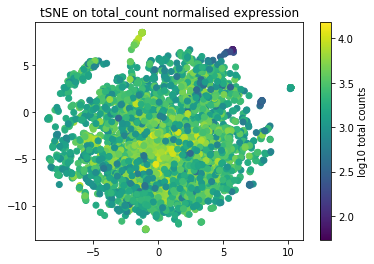

In [396]:
plt.scatter(YY[:,0], YY[:,1], c=np.log10(sample_info.total_count));
plt.colorbar(label='log10 total counts');
plt.title('tSNE on total_count normalised expression');

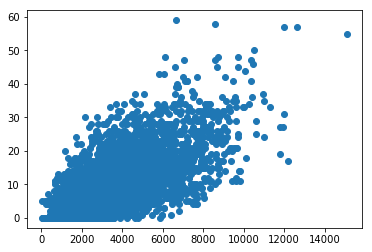

In [372]:
plt.scatter(sample_info.total_count, exp_mat.T["'Runx1'"])